In [1]:
%pylab notebook
import cv2

Populating the interactive namespace from numpy and matplotlib


In [2]:
img = cv2.imread("dog.jpg")

In [3]:
display(img)

array([[[197, 210, 226],
        [197, 210, 226],
        [197, 210, 226],
        ...,
        [225, 228, 233],
        [225, 228, 233],
        [225, 228, 233]],

       [[197, 210, 226],
        [197, 210, 226],
        [197, 210, 226],
        ...,
        [225, 228, 233],
        [225, 228, 233],
        [225, 228, 233]],

       [[197, 210, 226],
        [197, 210, 226],
        [197, 210, 226],
        ...,
        [225, 228, 233],
        [225, 228, 233],
        [225, 228, 233]],

       ...,

       [[175, 189, 207],
        [175, 189, 207],
        [175, 189, 207],
        ...,
        [ 52,  97, 154],
        [ 55, 100, 157],
        [ 56, 102, 160]],

       [[175, 189, 207],
        [175, 189, 207],
        [175, 189, 207],
        ...,
        [ 52,  97, 154],
        [ 55, 100, 157],
        [ 56, 102, 160]],

       [[175, 189, 207],
        [175, 189, 207],
        [175, 189, 207],
        ...,
        [ 52,  97, 154],
        [ 55, 100, 157],
        [ 56, 102, 160]]

In [4]:
cv2.imshow("Image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
print(type(img))

<class 'numpy.ndarray'>


In [6]:
print(img.shape[0:2])

(228, 221)


# Image Rotation

Okay, now we have our image matrix and we want to get the rotation matrix. To get the rotation matrix, we use the getRotationMatrix2D() method of cv2. The syntax of getRotationMatrix2D() is:

__cv2.getRotationMatrix2D(center, angle, scale)__

Here the center is the center point of rotation, the angle is the angle in degrees and scale is the scale property which makes the image fit on the screen.

In [7]:
height, width = img.shape[0:2]

In [8]:
rotationMatrix = cv2.getRotationMatrix2D((width/2,height/2),90,.5)

In [9]:
rotatedImage = cv2.warpAffine(img,rotationMatrix,(width,height))

In [10]:
cv2.imshow('ROtated Image', rotatedImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

# crop an image

Now get the starting and ending index of the row and column. This will define the size of the newly created image. For example, start from row number 10 till row number 15 will give the height of the image.

Similarly, start from column number 10 until column number 15 will give the width of the image.

You can get the starting point by specifying the percentage value of the total height and the total width. Similarly, to get the ending point of the cropped image, specify the percentage values as below

In [11]:
startRow = int(height*.15)

startcol = int(width*.15)

endRow = int(height*.85)

endcol = int(width*.85)

Now map these values to the original image. Note that you have to cast the starting and ending values to integers because when mapping, the indexes are always integers.

In [12]:
croppedImage = img[startRow:endRow, startcol:endcol]

Here we specified the range from starting to ending of rows and columns.

Now display the original and cropped image in the output:

In [13]:
cv2.imshow('Original Image', img)

cv2.imshow('Cropped Image', croppedImage)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Resize an Image

To resize an image, you can use the resize() method of openCV. In the resize method, you can either specify the values of x and y axis or the number of rows and columns which tells the size of the image

In [14]:
newImg = cv2.resize(img, (0,0), fx=0.75, fy=0.75)

cv2.imshow('Resized Image', newImg)

cv2.waitKey(0)
cv2.destroyAllWindows()

Now using the row and column values to resize the image:

In [15]:
newImg = cv2.resize(img, (550, 350))

cv2.imshow('Resized Image', newImg)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Adjust Image Contrast

In Python OpenCV module, there is no particular function to adjust image contrast but the official documentation of OpenCV suggests an equation that can perform image brightness and image contrast both at the same time.

__new_img = a * original_img + b__

Here a is alpha which defines contrast of the image. If a is greater than 1, there will be higher contrast.

If the value of a is between 0 and 1 (smaller than 1 but greater than 0), there would be lower contrast. If a is 1, there will be no contrast effect on the image.

b stands for beta. The values of b vary from -127 to +127.

To implement this equation in Python OpenCV, you can use the addWeighted() method. We use The addWeighted() method as it generates the output in the range of 0 and 255 for a 24-bit color image.

The syntax of addWeighted() method is as follows:

__cv2.addWeighted(source_img1, alpha1, source_img2, alpha2, beta)__

This syntax will blend two images, the first source image (source_img1) with a weight of alpha1 and second source image (source_img2).

If you only want to apply contrast in one image, you can add a second image source as zeros using NumPy.

In [16]:
contrast_img = cv2.addWeighted(img, 2.5, np.zeros(img.shape, img.dtype), 0, 0)

cv2.imshow('Original Image', img)

cv2.imshow('Contrast Image', contrast_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Make an image blurry
## Gaussian Blur

To make an image blurry, you can use the GaussianBlur() method of OpenCV.

The GaussianBlur() uses the Gaussian kernel. The height and width of the kernel should be a positive and an odd number.

Then you have to specify the X and Y direction that is sigmaX and sigmaY respectively. If only one is specified, both are considered the same.

Consider the following example:

In [17]:
blur_image = cv2.GaussianBlur(img, (7,7), 0)

cv2.imshow('Original Image', img)

cv2.imshow('Blur Image', blur_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Median Blur

In median blurring, the median of all the pixels of the image is calculated inside the kernel area. The central value is then replaced with the resultant median value. Median blurring is used when there are salt and pepper noise in the image.

To apply median blurring, you can use the medianBlur() method of OpenCV.

Consider the following example where we have a salt and pepper noise in the image:

In [18]:
blur_image = cv2.medianBlur(img,5)

#This will apply 50% noise in the image along with median blur. Now show the images:

cv2.imshow('Original Image', img)

cv2.imshow('Blur Image', blur_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Detect Edges

To detect the edges in an image, you can use the Canny() method of cv2 which implements the Canny edge detector. The Canny edge detector is also known as the optimal detector.

The syntax to Canny() is as follows:

__cv2.Canny(image, minVal, maxVal)__

Here minVal and maxVal are the minimum and maximum intensity gradient values respectively.

In [21]:
edge_img = cv2.Canny(img,100,200)

cv2.imshow("Detected Edges", edge_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Convert image to grayscale (Black & White)

The easy way to convert an image in grayscale is to load it like this:

__img = cv2.imread("pyimg.jpg", 0)__

There is another method using BGR2GRAY.

To convert a color image into a grayscale image, use the BGR2GRAY attribute of the cv2 module. This is demonstrated in the example below:

Use the cvtColor() method of the cv2 module which takes the original image and the COLOR_BGR2GRAY attribute as an argument. Store the resultant image in a variable:

__gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)__

In [20]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow("Original Image", img)

cv2.imshow("Gray Scale Image", gray_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Centroid (Center of blob) detection

To find the center of an image, the first step is to convert the original image into grayscale. We can use the cvtColor() method of cv2 as we did before.

In [22]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

We read the image and convert it to a grayscale image. The new image is stored in gray_img.

Now we have to calculate the moments of the image. Use the moments() method of cv2. In the moments() method, the grayscale image will be passed as below:

In [23]:
moment = cv2.moments(gray_img)

Then we need to calculate the x and y coordinates of the center of the image by using the moments that we got above:

In [24]:
X = int(moment ["m10"] / moment["m00"])

Y = int(moment ["m01"] / moment["m00"])

Finally, we have the center of the image. To highlight this center position, we can use the circle method which will create a circle in the given coordinates of the given radius.

The circle() method takes the img, the x and y coordinates where the circle will be created, the size, the color that we want the circle to be and the thickness.



In [25]:
cv2.circle(img, (X, Y), 15, (205, 114, 101), 1)

array([[[197, 210, 226],
        [197, 210, 226],
        [197, 210, 226],
        ...,
        [225, 228, 233],
        [225, 228, 233],
        [225, 228, 233]],

       [[197, 210, 226],
        [197, 210, 226],
        [197, 210, 226],
        ...,
        [225, 228, 233],
        [225, 228, 233],
        [225, 228, 233]],

       [[197, 210, 226],
        [197, 210, 226],
        [197, 210, 226],
        ...,
        [225, 228, 233],
        [225, 228, 233],
        [225, 228, 233]],

       ...,

       [[175, 189, 207],
        [175, 189, 207],
        [175, 189, 207],
        ...,
        [ 52,  97, 154],
        [ 55, 100, 157],
        [ 56, 102, 160]],

       [[175, 189, 207],
        [175, 189, 207],
        [175, 189, 207],
        ...,
        [ 52,  97, 154],
        [ 55, 100, 157],
        [ 56, 102, 160]],

       [[175, 189, 207],
        [175, 189, 207],
        [175, 189, 207],
        ...,
        [ 52,  97, 154],
        [ 55, 100, 157],
        [ 56, 102, 160]]

In [26]:
cv2.imshow("Center of the Image", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Apply a mask for a colored image

Image masking means to apply some other image as a mask on the original image or to change the pixel values in the image.

To apply a mask on the image, we will use the HoughCircles() method of the OpenCV module. The HoughCircles() method detects the circles in an image. After detecting the circles, we can simply apply a mask on these circles.

The HoughCircles() method takes the original image, the Hough Gradient (which detects the gradient information in the edges of the circle), and the information from the following circle equation:

(x - xcenter)2 + (y - ycenter)2 = r2 

In this equation (xcenter , ycenter) is the center of the circle and r is the radius of the circle.

In [27]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Detecting the circles in the image using the HoughCircles() code from OpenCV: __Hough Circle Transform:__



In [28]:
gray_img = cv2.medianBlur(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 3)

circles = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=50, minRadius=0, maxRadius=0)

circles = np.uint16(np.around(circles))

In [29]:
masking=np.full((img1.shape[0], img1.shape[1]),0,dtype=np.uint8)

for j in circles[0, :]:

    cv2.circle(masking, (j[0], j[1]), j[2], (255, 255, 255), -1)

In [32]:
final_img = cv2.bitwise_or(img1, img1, mask=masking)

In [34]:
cv2.imshow('FinalImage',final_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Reduce Noise

To reduce noise from an image, OpenCV provides the following methods:

    fastNlMeansDenoising(): Removes noise from a grayscale image
    fastNlMeansDenoisingColored(): Removes noise from a colored image
    fastNlMeansDenoisingMulti(): Removes noise from grayscale image frames (a grayscale video)
    fastNlMeansDenoisingColoredMulti(): Same as 3 but works with colored frames

Let’s use fastNlMeansDenoisingColored() in our example:

In [45]:
import cv2

img = cv2.imread("dog.jpeg")

Apply the denoising function which takes respectively the original image (src), the destination (which we have kept none as we are storing the resultant), the filter strength, the image value to remove the colored noise (usually equal to filter strength or 10), the template patch size in pixel to compute weights which should always be odd (recommended size equals 7) and the window size in pixels to compute average of the given pixel.

In [47]:
result = cv2.fastNlMeansDenoisingColored(img,None,20,10,7,21)

In [48]:
cv2.imshow("Original Image", img)

cv2.imshow("Denoised Image", result)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Get image contour

Contours are the curves in an image that are joint together. The curves join the continuous points in an image. The purpose of contours is used to detect the objects.

The original image of which we are getting the contours of is given below:

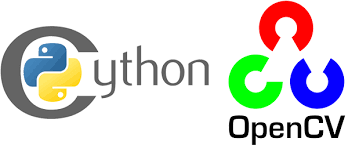

In [49]:
im = cv2.imread('py.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [50]:
retval, thresh = cv2.threshold(gray_img, 127, 255, 0)
img_contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, img_contours, -1, (0, 255, 0))
cv2.imshow('Image Contours', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Remove Background from an image

To remove the background from an image, we will find the contours to detect edges of the main object and create a mask with np.zeros for the background and then combine the mask and the image using the bitwise_and operator.

Consider the example below:

In [54]:
img = cv2.imread("py.png")

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
img_contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
img_contours = sorted(img_contours, key=cv2.contourArea)

for i in img_contours:

    if cv2.contourArea(i) > 100:

        break
        
mask = np.zeros(img.shape[:2], np.uint8)
cv2.drawContours(mask, [i],-1, 255, -1)
new_img = cv2.bitwise_and(img, img, mask=mask)
cv2.imshow("Original Image", img)
cv2.imshow("Image with background removed", new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()